In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt

In [ ]:
print(pd.__version__)
print(np.__version__)
print(sns.__version__)
print(sp.__version__)

2.0.3
1.25.2
0.13.1
1.11.4


# Estatística Descritiva

In [ ]:
dados = pd.read_csv('dados.csv') ## carregando os dados em uma váriavel

In [ ]:
type(dados) ## verificando o tipo.

pandas.core.frame.DataFrame

In [ ]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


# Dados Qualitativos

In [ ]:
sorted(dados['Anos de Estudo'].unique()) ## verificando os valores unicos de estudo

## esse dado consideramos como qualitativa ordinal. Podem ser ordenadas e hierarquizadas.

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [ ]:
sorted(dados['UF'].unique()) ## verificando os valores unicos de UF

## esse dado consideramos como qualitativa nominal. Não podem ser ordenadas e hierarquizadas.

[11,
 12,
 13,
 14,
 15,
 16,
 17,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 35,
 41,
 42,
 43,
 50,
 51,
 52,
 53]

In [ ]:
sorted(dados['Sexo'].unique()) ## verificando os valores unicos de Sexo.

## esse dado consideramos como qualitativa nominal. Não podem ser ordenadas e hierarquizadas.

[0, 1]

In [ ]:
sorted(dados['Cor'].unique()) ## verificando os valores unicos de Cor.

## esse dado consideramos como qualitativa nominal. Não podem ser ordenadas e hierarquizadas.

[0, 2, 4, 6, 8]

# Dados Quantitativos

In [ ]:
print(dados.Idade.min()) ## vendo a idade minima - discreta.
print(dados.Idade.max()) ## vendo a idade maxima - discreta.
print(dados.Idade.mean()) ## vendo a média de idade - continua.

13
99
44.07142113482561


In [ ]:
print('De %s até %s anos ' % (dados.Idade.min(), dados.Idade.max()))

De 13 até 99 anos 


**Quantitativo pode ser Discreta:  números inteiros.**

**Continua: Frações / Float.**


In [ ]:
print('De %s até %s metros ' % (dados.Altura.min(), dados.Altura.max())) ## quantitativa continua.

De 1.339244614 até 2.028496765 metros 


# Distribuição de Frequências

In [ ]:
dados['Sexo'].value_counts() ## contando os valores de Sexo masculino e feminino.

Sexo
0    53250
1    23590
Name: count, dtype: int64

In [ ]:
dados['Sexo'].value_counts(normalize = True) * 100 ## colocando em percentual.

Sexo
0    69.299844
1    30.700156
Name: proportion, dtype: float64

In [ ]:
frequencia = dados['Sexo'].value_counts() ## criando variavel

In [ ]:
percentual = dados['Sexo'].value_counts(normalize = True) * 100

In [ ]:
dist_freq_qualitativas = pd.DataFrame({'Frequencia': frequencia, 'Porcentagem (%)': percentual}) ## criando um DataFrame com as variaveis

In [ ]:
dist_freq_qualitativas

,Frequencia,Porcentagem (%)
Sexo,,
0,53250,69.299844
1,23590,30.700156


In [ ]:
dist_freq_qualitativas.rename(index = {0: 'Masculino', 1: 'Feminino'}, inplace = True ) ## alterando o nome da linha de Sexo.

In [ ]:
dist_freq_qualitativas

,Frequencia,Porcentagem (%)
Sexo,,
Masculino,53250,69.299844
Feminino,23590,30.700156


In [ ]:
dist_freq_qualitativas.rename_axis('Sexo', axis = 1, inplace = True ) ## alterando o nome da Coluna.

In [ ]:
dist_freq_qualitativas

Sexo,Frequencia,Porcentagem (%)
Sexo,,
Masculino,53250,69.299844
Feminino,23590,30.700156


Criando outro metódo de de calcular frequências

In [ ]:
sexo = {0: 'Masculino', 1: 'Feminino'}  ## declarando variaveis.
cor = {0: 'Indígena', 2: 'Branca',
        4: 'Preta', 6: 'Amarela',
        8: 'Parda', 9: 'Sem Declaração'}

In [ ]:
frequencia = pd.crosstab(dados.Sexo, dados.Cor)  ## criando o df usando . crosstab, que puxa a coluna sexo e cor.
frequencia.rename(index = sexo, inplace = True)  ## renomeando as linhas index.
frequencia.rename(columns = cor, inplace = True) ## renomeando as colunas pela cor.

frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [ ]:
percentual = pd.crosstab(dados.Sexo, dados.Cor, normalize = True) * 100 ## criando agora como porcentagem, usando normaliza = True e multiplicando por 100.
percentual.rename(index = sexo, inplace = True)
percentual.rename(columns = cor, inplace = True)

percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


Trabalhando com variaveis quantitativas

A função pd.cut no pandas é usada para segmentar e ordenar os dados em intervalos (ou bins). Esta função é útil para transformar uma variável contínua em uma variável categórica, o que pode ser especialmente útil em análises exploratórias de dados, visualização, ou preparação de dados para modelagem.


pd.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise', ordered=True)

Parâmetros Principais

x: Sequência de entrada (array-like). Os dados a serem segmentados.

bins: Inteiro ou sequência de scalars. Definem os limites dos intervalos. Pode ser um número que especifica a quantidade de intervalos desejados, ou uma lista que define os limites específicos dos intervalos.

right: Booleano, padrão True. Indica se os intervalos são abertos ou fechados no lado direito.

labels: Sequência ou booleano, padrão None. Especifica os rótulos para os intervalos. Se False, retorna a matriz de intervalos sem rótulos.

retbins: Booleano, padrão False. Se True, retorna os intervalos além dos dados segmentados.

precision: Inteiro, padrão 3. Número de casas decimais de precisão para os intervalos.

include_lowest: Booleano, padrão False. Indica se o menor valor deve ser incluído no primeiro intervalo.

duplicates: {'raise', 'drop'}, padrão 'raise'. Como lidar com intervalos duplicados.

ordered: Booleano, padrão True. Se os intervalos devem ser retornados como uma Categorical ordenada.

In [ ]:
dados.Renda.min()

0

In [ ]:
dados.Renda.max()

200000

In [ ]:
classes = [0, 1576, 3152, 7880, 15760, 200000] ## criando classes de rendas.

In [ ]:
labels = ['E','D','C','B','A'] ## definindo os tipos de classes com labels.

In [ ]:
pd.cut(x = dados.Renda,  ## aqui com .cut transforamos renda de um dado quantitativo para um dado qualitativo ordenado em classes.
       bins = classes,  ## apontamos em bins o intervalo ou limites.
       labels = labels, ## especificamos os rótulos para os intervalos
       include_lowest= True) ## incluimos o menor valor no intervalo

0        E
1        E
2        E
3        C
4        E
        ..
76835    E
76836    E
76837    E
76838    E
76839    E
Name: Renda, Length: 76840, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [ ]:
pd.value_counts(            ## aqui estamos calculando a quantidade de dados pelas classes criadas.
    pd.cut(x = dados.Renda,
       bins = classes,
       labels = labels,
       include_lowest= True)
    )

Renda
E    49755
D    16700
C     7599
B     2178
A      608
Name: count, dtype: int64

In [ ]:
frequencia = pd.value_counts(            ## colocamos na variavel frequencia.
    pd.cut(x = dados.Renda,
       bins = classes,
       labels = labels,
       include_lowest= True)
)
frequencia

Renda
E    49755
D    16700
C     7599
B     2178
A      608
Name: count, dtype: int64

In [ ]:
percentual = pd.value_counts(            ## transformando em porcentagem.
    pd.cut(x = dados.Renda,
       bins = classes,
       labels = labels,
       include_lowest= True), normalize = True
) * 100
percentual

Renda
E    64.751432
D    21.733472
C     9.889381
B     2.834461
A     0.791255
Name: proportion, dtype: float64

In [ ]:
dist_freq_quantitativas_personalizadas = pd.DataFrame({'Frequencia': frequencia,
                                                       'Porcentagem (%)': percentual}) ## criando um DataFrame com as variaveis.

dist_freq_quantitativas_personalizadas.sort_index(ascending= False)  ## mostrando o DataFrame em ordem.

,Frequencia,Porcentagem (%)
Renda,,
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432


### Outro Exemplo de cut()

In [ ]:
classes = [dados.Altura.min(), 1.65, 1.75, dados.Altura.max()]
labels = ['1 - Baixa', '2 - Média', '3 - Alta']

frequencia = pd.value_counts(
    pd.cut(
        x = dados.Altura,
        bins = classes,
        labels = labels,
        include_lowest = True
    )
)

percentual = pd.value_counts(
    pd.cut(
        x = dados.Altura,
        bins = classes,
        labels = labels,
        include_lowest = True
    ), normalize = True
) * 100

dist_freq_altura = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)

dist_freq_altura.rename_axis('Estaturas', axis= 'columns', inplace = True)

dist_freq_altura.sort_index(ascending = True, inplace = True)

dist_freq_altura

Estaturas,Frequência,Porcentagem (%)
Altura,,
1 - Baixa,20529,26.716554
2 - Média,36162,47.061426
3 - Alta,20149,26.222020


# Distribuição de frequências quantitativas - Classes de amplitude fixa

# Para definirmos um número de classe fixa podemos utilizar a regra de Sturges.
 A regra de Sturges é um método para definição do número de classes, baseado no total de amostras do banco de dados.

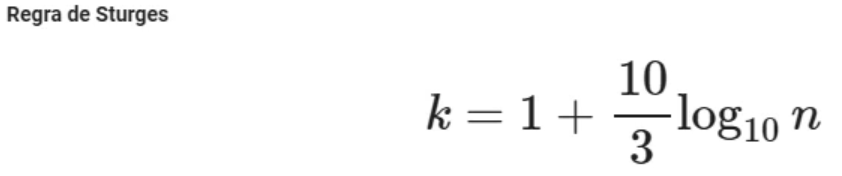

In [ ]:
n = dados.shape[0] ## pegando a quantidade de linhas. Aqui estamos utilizando numpy.
n

76840

In [ ]:
k = 1 + (10 / 3) * np.log10(n) ## aplicando a formula, utilizando . log
k    ## aqui temos que a quantidade ideal de classes seria 17.

17.285291187298853

In [ ]:
k = int(k.round(0)) ## arredondo para inteiro
k

17

Criando tabela de frequencias

In [ ]:
pd.value_counts(
    pd.cut(
        x = dados.Renda,
        bins = k,  ## aqui estamos usando cut para criar as classes e apontando k(17) como bins, pois dessa forma havera 17 elementos por class
        include_lowest = True
    )
)

Renda
(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(94117.647, 105882.353]         6
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(188235.294, 200000.0]          3
(82352.941, 94117.647]          1
(117647.059, 129411.765]        1
(105882.353, 117647.059]        0
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
Name: count, dtype: int64

In [ ]:
pd.value_counts(
    pd.cut(
        x = dados.Renda,
        bins = k,
        include_lowest = True
    ),
    sort = False  ## aplicamos sort = False para ordernar.
)

Renda
(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(82352.941, 94117.647]          1
(94117.647, 105882.353]         6
(105882.353, 117647.059]        0
(117647.059, 129411.765]        1
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
(188235.294, 200000.0]          3
Name: count, dtype: int64

In [ ]:
frequencia = pd.value_counts(  ## colocando em uma variavel.
    pd.cut(
        x = dados.Renda,
        bins = k,
        include_lowest = True
    ),
    sort = False
)

frequencia

Renda
(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(82352.941, 94117.647]          1
(94117.647, 105882.353]         6
(105882.353, 117647.059]        0
(117647.059, 129411.765]        1
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
(188235.294, 200000.0]          3
Name: count, dtype: int64

In [ ]:
percentual = pd.value_counts(  ## colocando em uma variavel.
    pd.cut(
        x = dados.Renda,
        bins = k,
        include_lowest = True,
    ),
    sort = False,
    normalize = True,

) * 100

percentual

Renda
(-200.001, 11764.706]       98.378449
(11764.706, 23529.412]       1.330036
(23529.412, 35294.118]       0.219938
(35294.118, 47058.824]       0.024727
(47058.824, 58823.529]       0.020822
(58823.529, 70588.235]       0.006507
(70588.235, 82352.941]       0.005206
(82352.941, 94117.647]       0.001301
(94117.647, 105882.353]      0.007808
(105882.353, 117647.059]     0.000000
(117647.059, 129411.765]     0.001301
(129411.765, 141176.471]     0.000000
(141176.471, 152941.176]     0.000000
(152941.176, 164705.882]     0.000000
(164705.882, 176470.588]     0.000000
(176470.588, 188235.294]     0.000000
(188235.294, 200000.0]       0.003904
Name: proportion, dtype: float64

In [ ]:
dist_freq_quantitativas_amplitude_fixa = pd.DataFrame({'Frequencia': frequencia,
                                                       'Porcentagem (%)': percentual}) ## criando um DataFrame com as variaveis.
dist_freq_quantitativas_amplitude_fixa

,Frequencia,Porcentagem (%)
Renda,,
"(-200.001, 11764.706]",75594,98.378449
"(11764.706, 23529.412]",1022,1.330036
"(23529.412, 35294.118]",169,0.219938
"(35294.118, 47058.824]",19,0.024727
"(47058.824, 58823.529]",16,0.020822
"(58823.529, 70588.235]",5,0.006507
"(70588.235, 82352.941]",4,0.005206
"(82352.941, 94117.647]",1,0.001301
"(94117.647, 105882.353]",6,0.007808


# Histograma

Usaremos a biblioteca seaborn as sns.

Biblioteca de visualização de dados

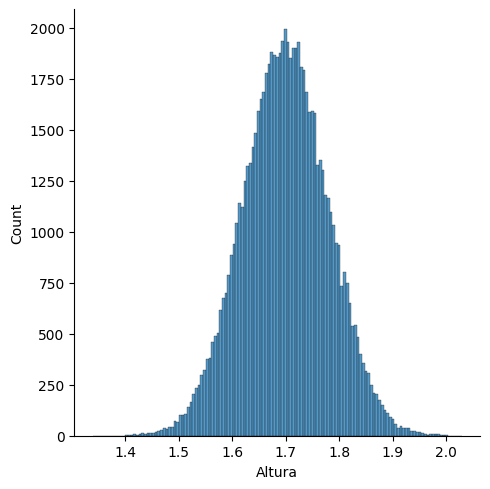

In [ ]:
ax = sns.displot(dados.Altura, kde = False) ## criando um grafico de altura com displot. kde = False está retirando a linha de expressão.


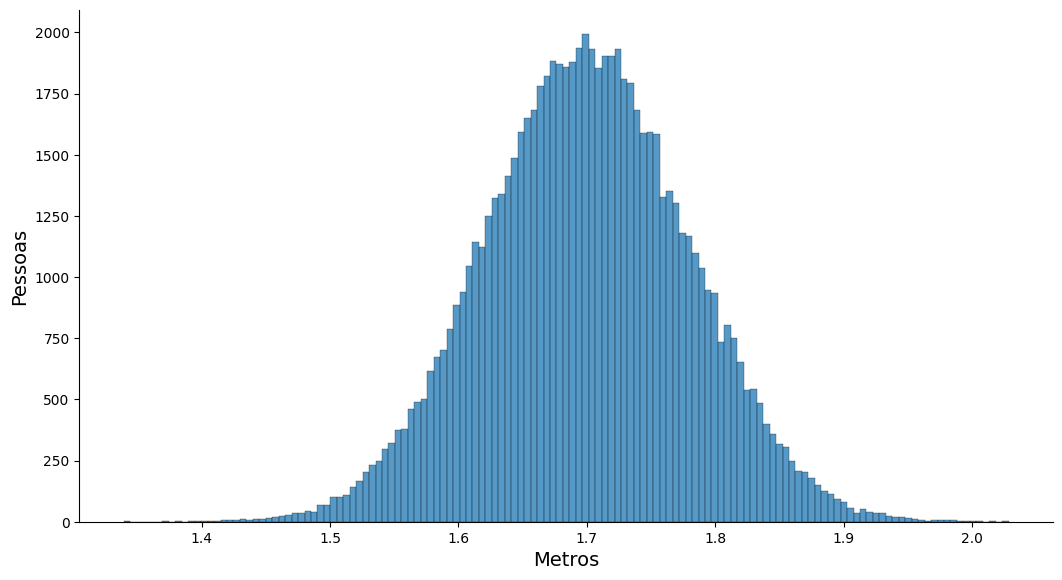

In [ ]:
ax = sns.displot(dados.Altura, kde = False)

ax.figure.set_size_inches(12, 6) ## configurando altura e largura
ax.set_titles('Distribuição de Frequências - Altura', fontsize = 18)  ## configurando título e fonte.
ax.set_xlabels('Metros', fontsize = 14)  ## configurando legenda do eixo x e fonte.
ax.set_ylabels('Pessoas', fontsize = 14)  ## configurando legenda do eixo y e fonte.
ax


<Axes: >

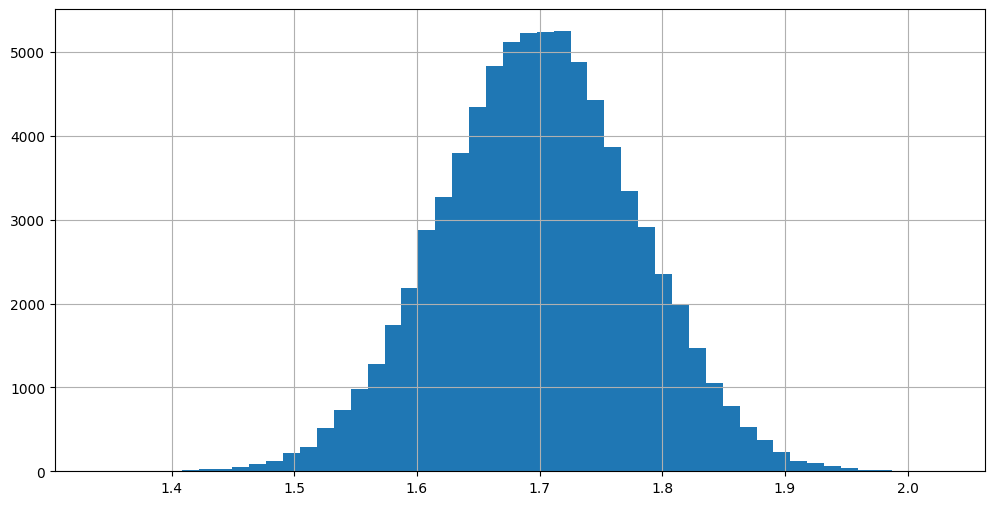

In [ ]:
dados.Altura.hist(bins = 50, figsize = (12, 6))  ## podemos plotar com pandas também, porém tem menos recursos de configurações.

<Axes: xlabel='Renda'>

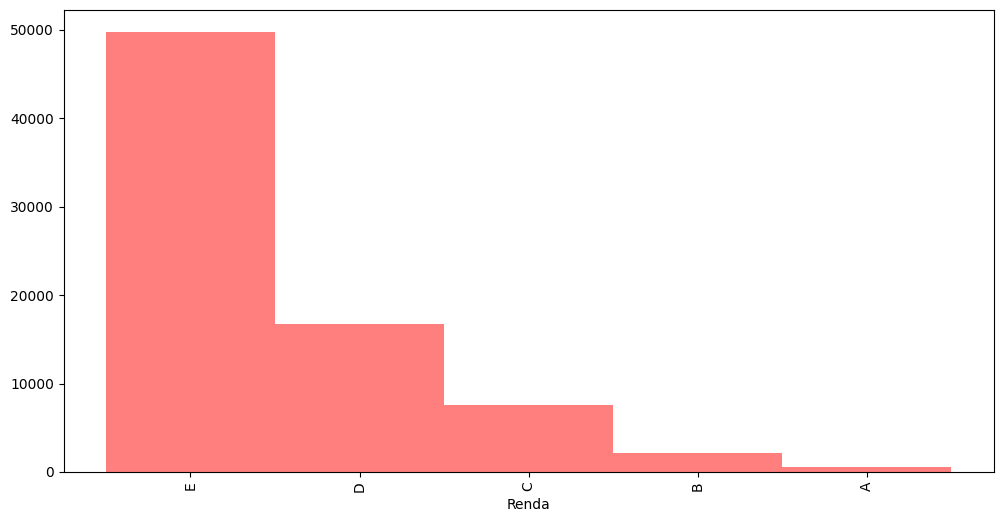

In [ ]:
dist_freq_quantitativas_personalizadas['Frequencia'].plot.bar(width = 1, color = 'red', alpha = 0.5, figsize = (12, 6))

# Medidas de Tendência Central

Média Aritimética, Mediana e Moda

## Média

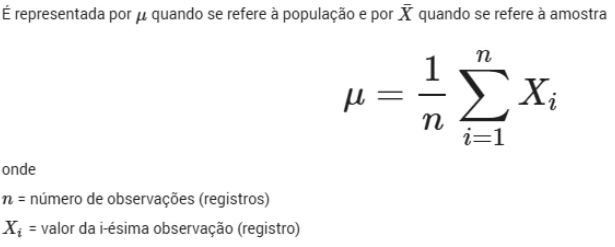

In [ ]:
df = pd.DataFrame(data = {'Fulano': [8, 10, 4, 8, 6, 10, 8],
                          'Beltrano': [10, 2, 0.5, 1, 3, 9.5, 10],
                          'Silcrano': [7.5, 8, 7, 8, 8, 8.5, 7],},      ## criando um dataframe de alunos com notas por matéria.
                  index = ['Matemática',
                           'Português',
                           'Inglês',
                           'Geografia',
                           'História',
                           'Física',
                           'Quimica'])
df.rename_axis('Matérias', axis = 'columns', inplace = True)
df

Matérias,Fulano,Beltrano,Silcrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Quimica,8,10.0,7.0


Média é influenciada pelos extremos, mesmo que a ocorrência de extremos sejam minimas.

In [ ]:
df['Fulano'].mean()  ## calculando a média de Fulano.

7.714285714285714

In [ ]:
dados.Renda.mean() ## calculando a média de Renda.

2000.3831988547631

In [ ]:
dados.groupby(['Sexo'])['Renda'].mean() ## aqui estamos agrupando Sexo e Renda e fazendo a média de Renda.

Sexo
0    2192.441596
1    1566.847393
Name: Renda, dtype: float64

In [ ]:
dataset = pd.DataFrame({
    'Sexo': ['H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M'],     ## outro exemplo tirando a média de idade.
    'Idade': [53, 72, 54, 27, 30, 40, 58, 32, 44, 51]
})

dataset['Idade'].mean()

46.1

In [ ]:
dataset = pd.DataFrame({
    'Sexo': ['H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M'],
    'Idade': [53, 72, 54, 27, 30, 40, 58, 32, 44, 51]
})

dataset.groupby(['Sexo'])['Idade'].mean() ## aqui estamos tirando a média de idade por sexo.

Sexo
H    45.750000
M    46.333333
Name: Idade, dtype: float64

## Mediana

Valor localizado no meio de uma tabela

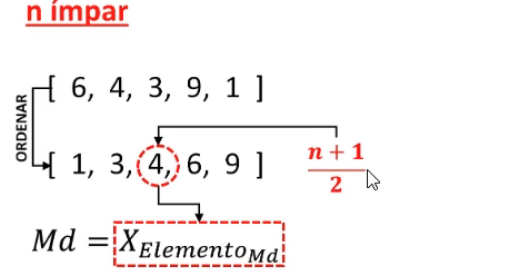

In [ ]:
notas_fulano = df.Fulano  ## pegando as notas.
notas_fulano

Matemática     8
Português     10
Inglês         4
Geografia      8
História       6
Física        10
Quimica        8
Name: Fulano, dtype: int64

In [ ]:
notas_fulano = notas_fulano.sort_values()  ## primeiro passo é ordernar os valores.
notas_fulano

Inglês         4
História       6
Matemática     8
Geografia      8
Quimica        8
Português     10
Física        10
Name: Fulano, dtype: int64

In [ ]:
notas_fulano = notas_fulano.reset_index()  ## transformando nossa series em DataFrame com .reset_index()
notas_fulano

,index,Fulano
0,Inglês,4
1,História,6
2,Matemática,8
3,Geografia,8
4,Quimica,8
5,Português,10
6,Física,10


In [ ]:
n = notas_fulano.shape[0]  ## criando a variavel n para armazenar a quantidade de itens.
n

7

In [ ]:
elemento_md = (n + 1) / 2  ## usando a fórmula para localizar onde está o elemento mediano.
                # lembrando que em python a contagem começa de 0, logo devemos subtrair 1.

                ## o resultado é 4 - 1 = 3
                ## a mediana está na linha 3 do index = Geografia, 8.
elemento_md

4.0

In [ ]:
notas_fulano.loc[elemento_md - 1] ## .loc seleciona um item dentro de um dataframe ou series.

index     Geografia
Fulano            8
Name: 3, dtype: object

In [ ]:
notas_fulano = df.Fulano  ## pegando as notas novamente.
notas_fulano

Matemática     8
Português     10
Inglês         4
Geografia      8
História       6
Física        10
Quimica        8
Name: Fulano, dtype: int64

In [ ]:
notas_fulano.median() ## .median trás a mediana.

8.0

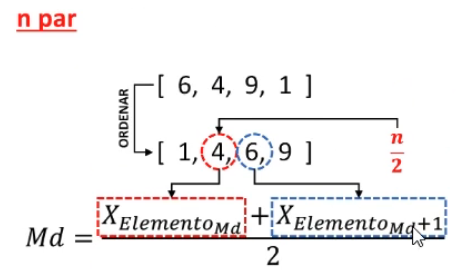

In [ ]:
notas_beltrano = df.Beltrano.sample(6, random_state =101) ##.sample faz uma amostra aleatória dentro de um df ou series
      ## random_state gera números aleatórios, mas no caso pedimos para ele gerar somente 101

      ## a ideia é fazer uma amostra de 6 (par) com os números 101

notas_beltrano

Matemática    10.0
Inglês         0.5
Física         9.5
História       3.0
Quimica       10.0
Português      2.0
Name: Beltrano, dtype: float64

In [ ]:
notas_beltrano.median() ##pegando a mediana

6.25

In [ ]:
dados.Renda.median() ## mediana da Renda

1200.0

# Moda

Elemento que mais se repete

Pode ser Bimodal e Multimodal, caso tenha mais de uma moda

In [ ]:
df

Matérias,Fulano,Beltrano,Silcrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Quimica,8,10.0,7.0


In [ ]:
df.mode()  ##.mode calcula a moda

Matérias,Fulano,Beltrano,Silcrano
0,8,10.0,8.0


In [ ]:
exemplo = pd.Series([1, 2, 2, 3, 4, 4, 5, 6, 6])  ## criando uma series
exemplo

0    1
1    2
2    2
3    3
4    4
5    4
6    5
7    6
8    6
dtype: int64

In [ ]:
exemplo.mode()  ## nesse caso a series é multimodal, pois se repete igualmente os númros 2, 4 e 6

0    2
1    4
2    6
dtype: int64

In [ ]:
dados.Renda.mode() ## moda do salario/renda

0    788
Name: Renda, dtype: int64

In [ ]:
dados.Altura.mode() ## moda da altura

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
Name: Altura, dtype: float64

## Relação entre medidas de tendência central

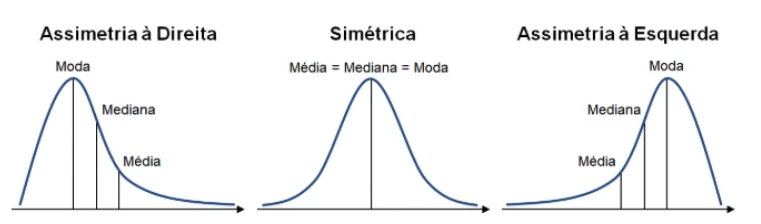

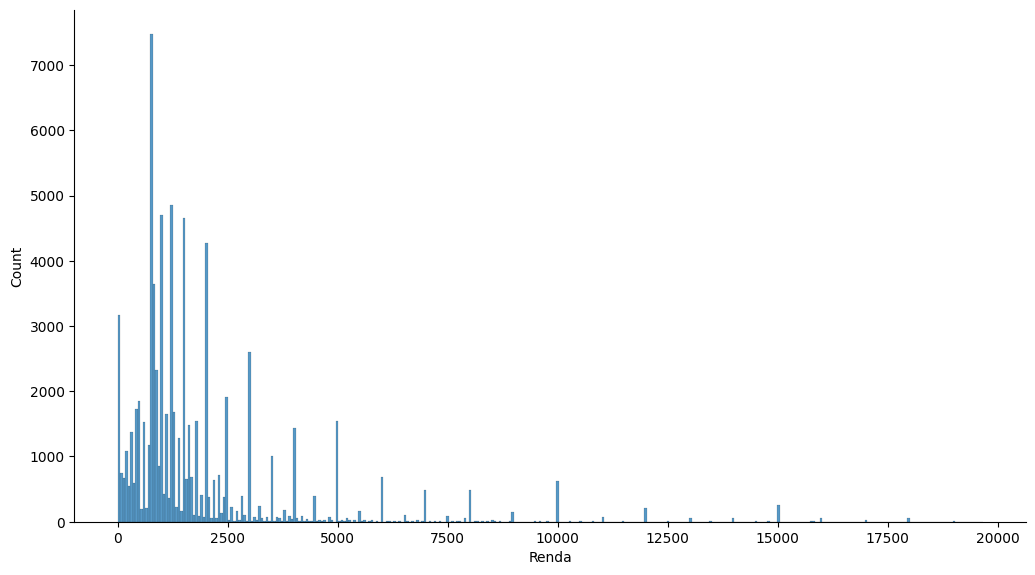

In [ ]:
ax = sns.displot(dados.query('Renda < 20000').Renda) ## criando um grafico dos que tem renda menor do que 20.000
ax.figure.set_size_inches(12, 6)
ax

In [ ]:
Moda = dados.Renda.mode()[0]
Moda

788

In [ ]:
Mediana = dados.Renda.median()
Mediana

1200.0

In [ ]:
Media = dados.Renda.mean()
Media

2000.3831988547631

In [ ]:
Moda < Mediana < Media ## aqui verificamos que a moda é menor que a mediana e ambas menores do que a media

True

Logo se encaixam na assimetria à Direita


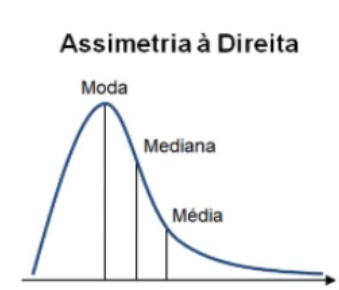

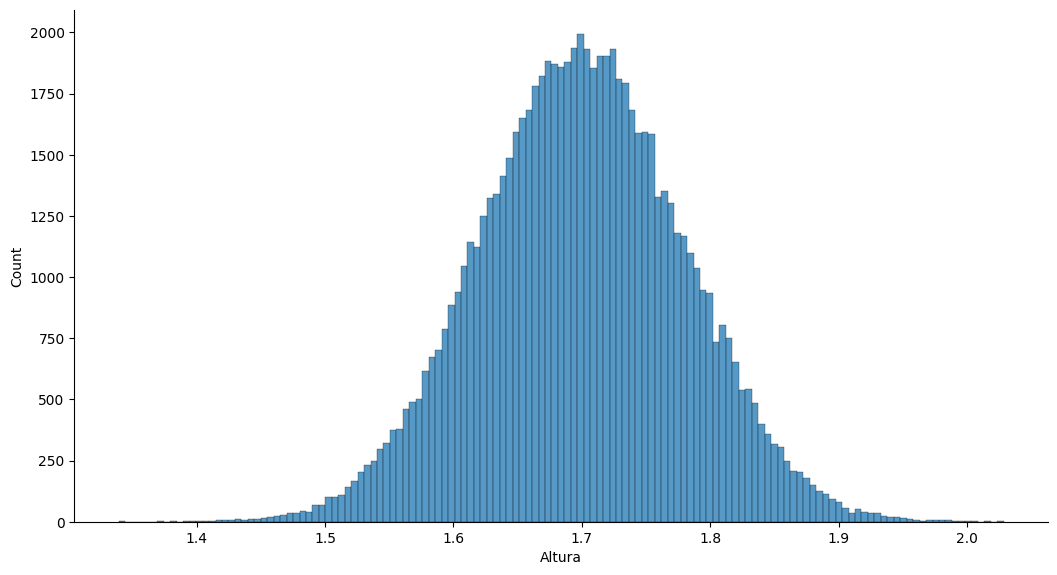

In [ ]:
ax = sns.displot(dados.Altura) ## criando um grafico da altura.
ax.figure.set_size_inches(12, 6)
ax

In [ ]:
Moda = dados.Altura.mode()
Moda

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
Name: Altura, dtype: float64

In [ ]:
Mediana = dados.Altura.median()
Mediana

1.6993247325

In [ ]:
Media = dados.Altura.mean()
Mediana

1.6993247325

Nesse caso, a moda, mediana  media estão bem próximos e podemos considerar simétrico

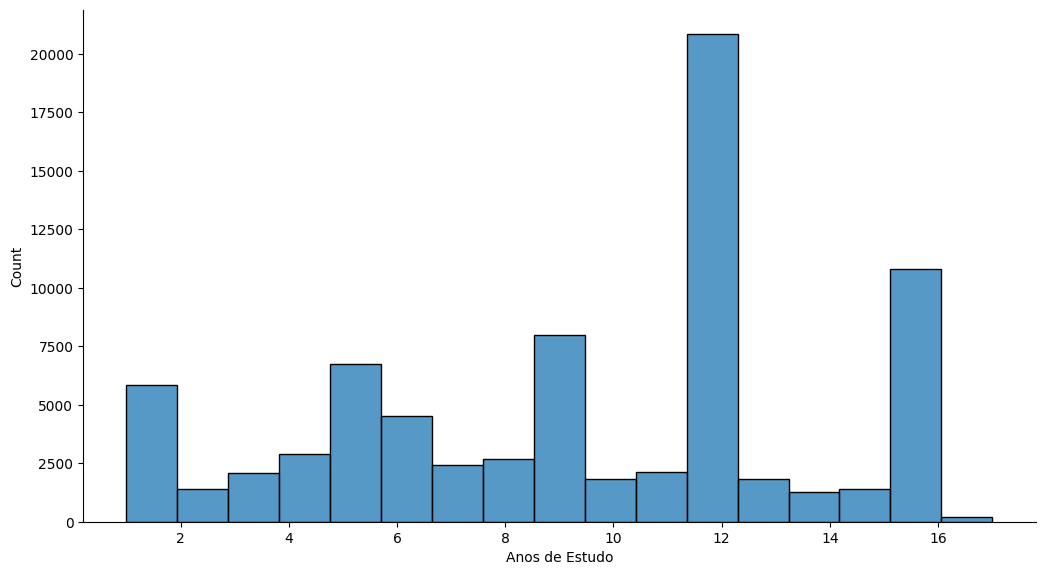

In [ ]:
ax = sns.displot(dados['Anos de Estudo'], bins = 17) ## criando um grafico e anos de estudo
ax.figure.set_size_inches(12, 6)
ax

In [ ]:
Moda = dados['Anos de Estudo'].mode()[0]
Moda

12

In [ ]:
Mediana = dados['Anos de Estudo'].median()
Mediana

11.0

In [ ]:
Media = dados['Anos de Estudo'].mean()
Media

9.469664237376367

In [ ]:
Moda > Mediana > Media

True

Nesse caso é assimetria a esquerda

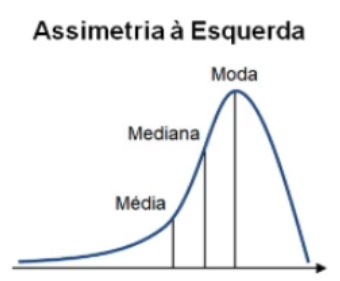

# Quartis, decis e percentis



quartil 1: 25%

quartil 2: 50%

quartil 3: 75%

In [ ]:
dados.Renda.quantile([0.25, 0.50, 0.75]) ## .quantile() divide em quantidades. Podemos usar ele para pegar os quartis

## ele sem parametros retorna a mediana = segundo quartil

0.25     788.0
0.50    1200.0
0.75    2000.0
Name: Renda, dtype: float64

decil 1: 10%

decil 2: 20%

...

decil 9: 90%

In [ ]:
[i / 10 for i in range(1, 10)] ## aqui criamos uma lista com os decis

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [ ]:
dados.Renda.quantile([i / 10 for i in range(1, 10)]) ## passamos a lista para o .quantile calcular os valores

0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: Renda, dtype: float64

percentil 1: 1%

percentil 2: 2%

...

percentil 99: 99%

In [ ]:
dados.Renda.quantile([i / 100 for i in range(1, 100)]) ## criando o percentil usando a lista, porem dividindo por 100 e aumentando o range para 100

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: Renda, Length: 99, dtype: float64

<Axes: xlabel='Anos', ylabel='Acumulado'>

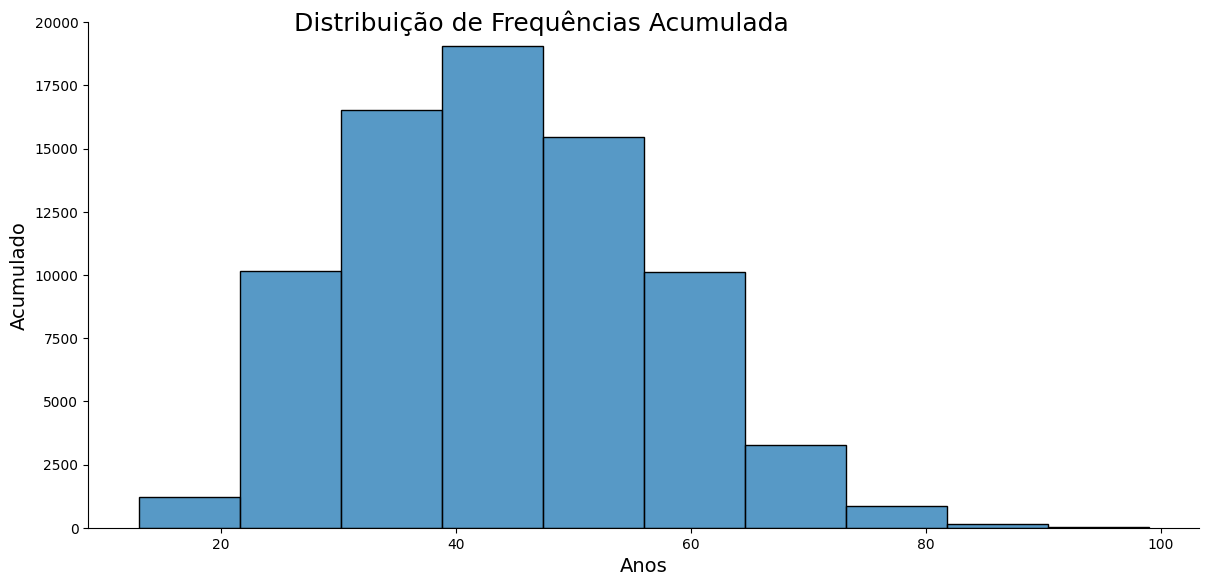

In [ ]:
ax = sns.displot(dados.Idade,
                 bins = 10)
ax.figure.set_size_inches(14, 6)
ax.fig.suptitle('Distribuição de Frequências Acumulada', fontsize=18) ##fig.suptitle() para configurar o título de um FaceTGrid.
ax.set_axis_labels("Anos", "Acumulado")              ##sex_axis_labels() para configurar os rotulos.
for ax in ax.axes.flat:
    ax.set_xlabel("Anos", fontsize=14)             ##dessa forma com for i in i.axes.flat, conseguimos configurar a fontesize dos rótulos.
    ax.set_ylabel("Acumulado", fontsize=14)

ax


In [ ]:
dados.Idade.quantile([ i / 10 for i in range(1, 10)]) ## fazendo o percentil de idades.

0.1    28.0
0.2    33.0
0.3    36.0
0.4    40.0
0.5    43.0
0.6    47.0
0.7    51.0
0.8    55.0
0.9    61.0
Name: Idade, dtype: float64

# Boxplot

<Axes: title={'center': 'Altura'}, xlabel='Metros'>

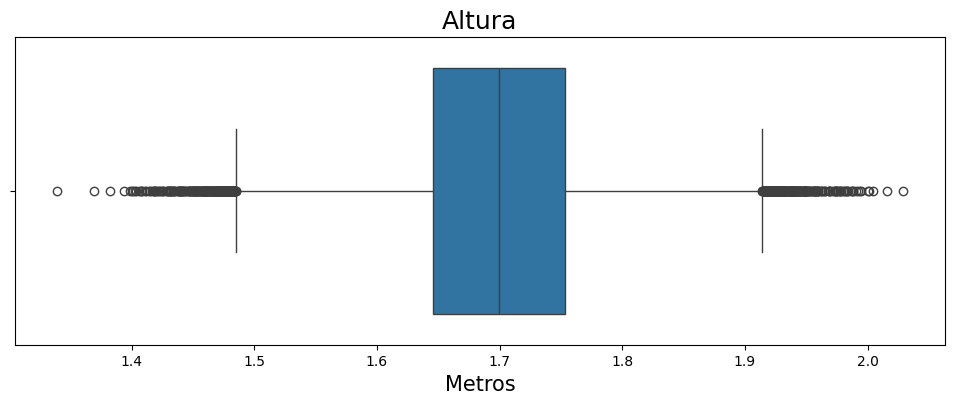

In [ ]:
ax = sns.boxplot( x = 'Altura', data = dados, orient = 'h') ## criando com .boxplot() data = está informando a
                                                              ## origem dos dados e orient = h está colocando em horizontal
ax.figure.set_size_inches(12, 4)
ax.set_title('Altura', fontsize = 18)
ax.set_xlabel('Metros', fontsize = 15)
ax

<Axes: title={'center': 'Altura'}, xlabel='Metros', ylabel='Sexo'>

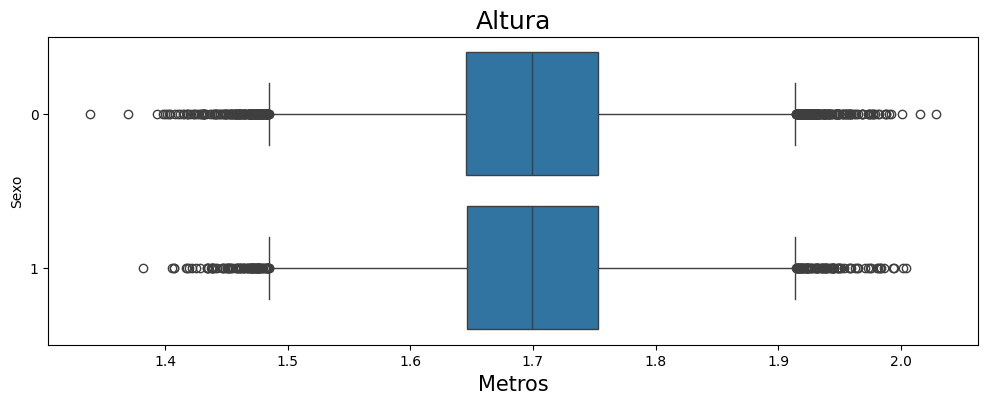

In [ ]:
ax = sns.boxplot( x = 'Altura', y = 'Sexo', data = dados, orient = 'h') ## podemos colocar duas variaveis, no caso apontamos altura e sexo.

ax.figure.set_size_inches(12, 4)
ax.set_title('Altura', fontsize = 18)
ax.set_xlabel('Metros', fontsize = 15)
ax

<Axes: title={'center': 'Renda'}, xlabel='R$'>

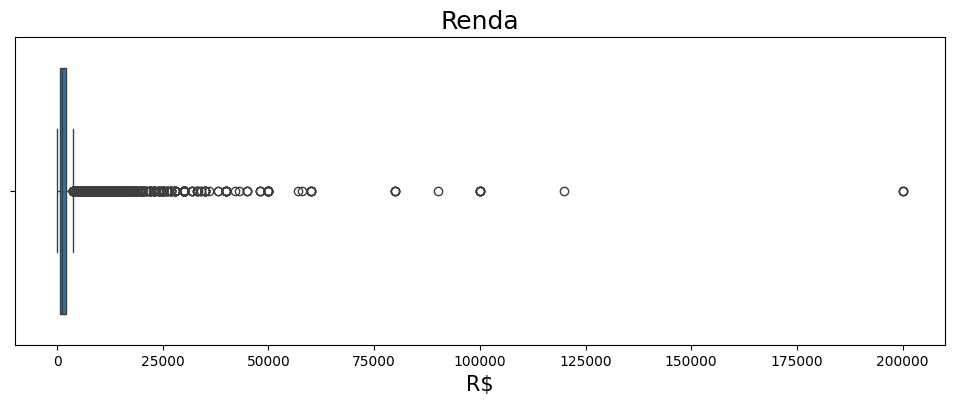

In [ ]:
ax = sns.boxplot( x = 'Renda', data = dados, orient = 'h') ## aqui estamos fazendo com a variavel Renda.
                                    ## por ser assimetrico o grafico boxplot ficará bem diferente
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize = 18)
ax.set_xlabel('R$', fontsize = 15)
ax

<Axes: title={'center': 'Renda'}, xlabel='R$'>

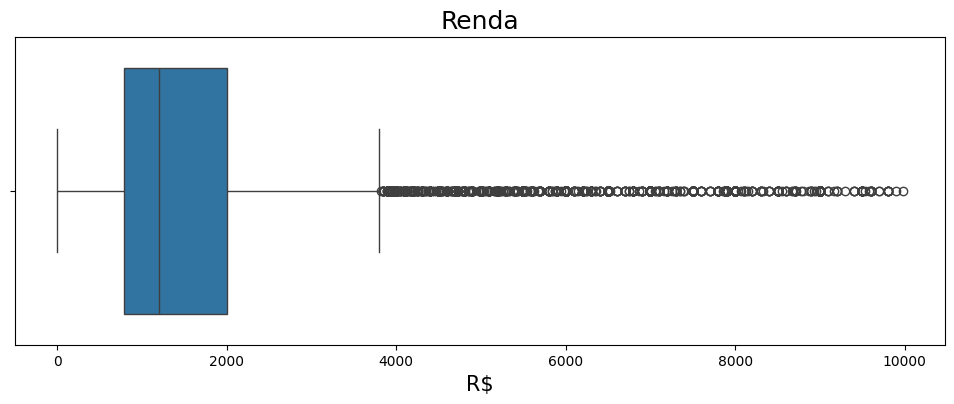

In [ ]:
ax = sns.boxplot( x = 'Renda', data = dados.query('Renda < 10000'), orient = 'h') ## com. query estamos selecionado somente quem tem a Renda menor que 10.000

ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize = 18)
ax.set_xlabel('R$', fontsize = 15)
ax

<Axes: title={'center': 'Renda'}, xlabel='R$', ylabel='Sexo'>

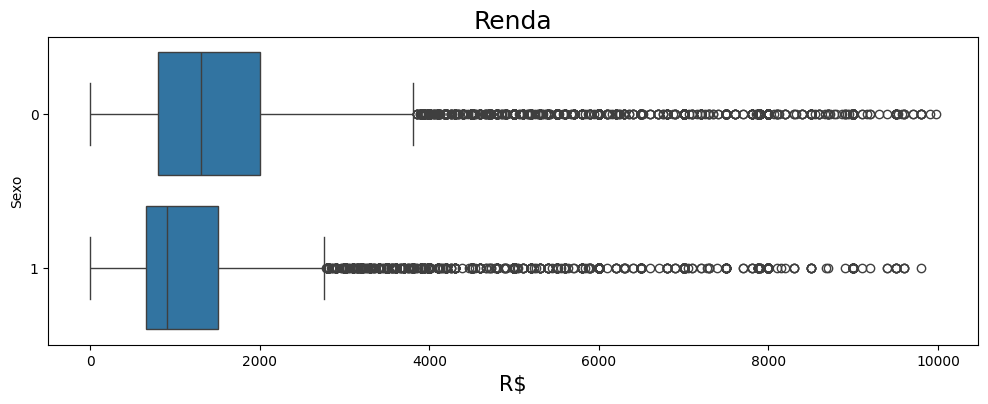

In [ ]:
ax = sns.boxplot( x = 'Renda', y = 'Sexo', data = dados.query('Renda < 10000'), orient = 'h')
                                    ## estamos vendo a rendas menores que 10.000 para cada sexo. Pode-se notar a diferencial salarial por sexo.
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize = 18)
ax.set_xlabel('R$', fontsize = 15)
ax

<Axes: title={'center': 'Anos de Estudo'}, xlabel='Anos'>

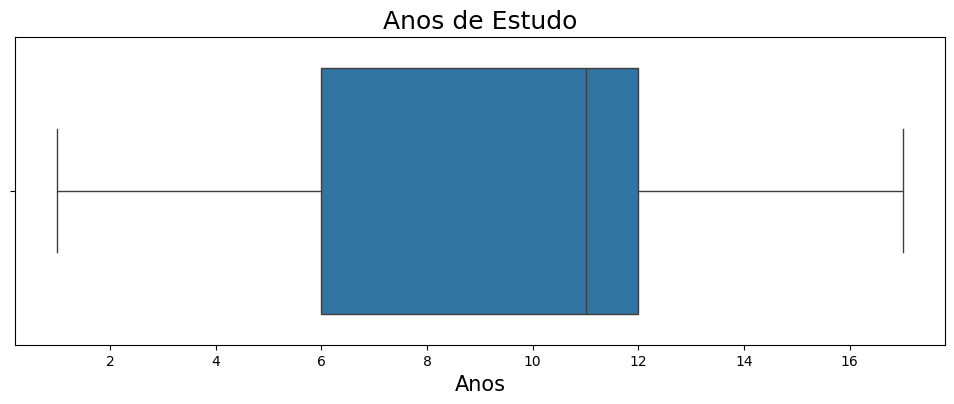

In [ ]:
ax = sns.boxplot( x = 'Anos de Estudo', data = dados, orient = 'h')
                                    ## estamos vendo um boxplot de anos de estudo.
ax.figure.set_size_inches(12, 4)
ax.set_title('Anos de Estudo', fontsize = 18)
ax.set_xlabel('Anos', fontsize = 15)
ax

<Axes: title={'center': 'Anos de Estudo'}, xlabel='Anos', ylabel='Sexo'>

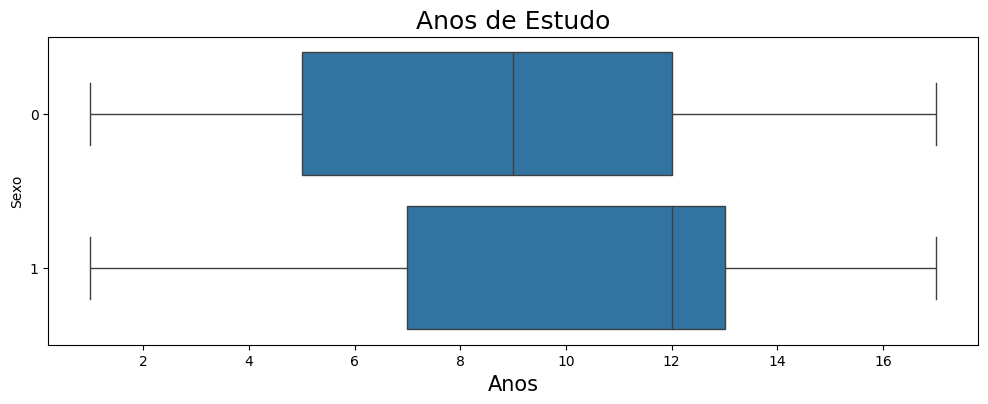

In [ ]:
ax = sns.boxplot( x = 'Anos de Estudo', y = 'Sexo', data = dados, orient = 'h')
                                    ## anos de estudo por sexo. Notamos que as mulheres tem uma média de estudo maior e mesmo assim continuam ganhando menos.
ax.figure.set_size_inches(12, 4)
ax.set_title('Anos de Estudo', fontsize = 18)
ax.set_xlabel('Anos', fontsize = 15)
ax

# Desvio Médio Absoluto

É um desvio calculado somente de números positivos

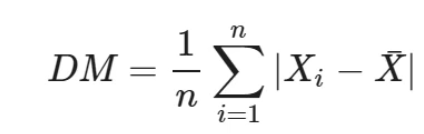

In [ ]:
df.mean() ## fulano e silcrano tem médias similares, apesar de terem uma distribuição diferente

Matérias
Fulano      7.714286
Beltrano    5.142857
Silcrano    7.714286
dtype: float64

In [ ]:
notas_fulano = df[['Fulano']]  ## um colchete cria uma series, dois colchotes cria um dataframe
notas_fulano

Matérias,Fulano
Matemática,8
Português,10
Inglês,4
Geografia,8
História,6
Física,10
Quimica,8


In [ ]:
nota_media_fulano = notas_fulano.mean()[0] ## estamos criando a variavel media de fulano. Para pegar somente o valor devemos usar [0]
nota_media_fulano

7.714285714285714

In [ ]:
notas_fulano['Desvio'] = notas_fulano['Fulano'] - nota_media_fulano ## aqui estamos criando o desvio, subtraindo a media das notas.
notas_fulano

<ipython-input-149-d1d51317a4d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notas_fulano['Desvio'] = notas_fulano['Fulano'] - nota_media_fulano ## aqui estamos criando o desvio, subtraindo a media das notas.


Matérias,Fulano,Desvio
Matemática,8,0.285714
Português,10,2.285714
Inglês,4,-3.714286
Geografia,8,0.285714
História,6,-1.714286
Física,10,2.285714
Quimica,8,0.285714


In [ ]:
notas_fulano['|Desvio|'] = notas_fulano['Desvio'].abs()  ## para a formula, precisamos apenas dos desvios absolutos (positivos),
                                                        ## dessa foram estamos usando o metódo .asb() para desconsiderar os sinais e transformar em absolutos
notas_fulano

Matérias,Fulano,Desvio,|Desvio|
Matemática,8,0.285714,0.285714
Português,10,2.285714,2.285714
Inglês,4,-3.714286,3.714286
Geografia,8,0.285714,0.285714
História,6,-1.714286,1.714286
Física,10,2.285714,2.285714
Quimica,8,0.285714,0.285714


In [ ]:
notas_fulano['|Desvio|'].mean() ## tiramos a media dos desvios absolutos

1.5510204081632648

In [ ]:
desvio_medio_absoluto = notas_fulano['Fulano'].mad() ## .mad() deveria calcular automaticamente o desvio medio padrão. Porém pode ter sido removido de pandas.
desvio_medio_absoluto

AttributeError: 'Series' object has no attribute 'mad'

In [ ]:
desvio_medio_absoluto = (df['Fulano'] - df['Fulano'].mean()).abs().mean() ## forma reduzida de cálcular o desvio médio padrão
desvio_medio_absoluto

1.5510204081632648

# Variância

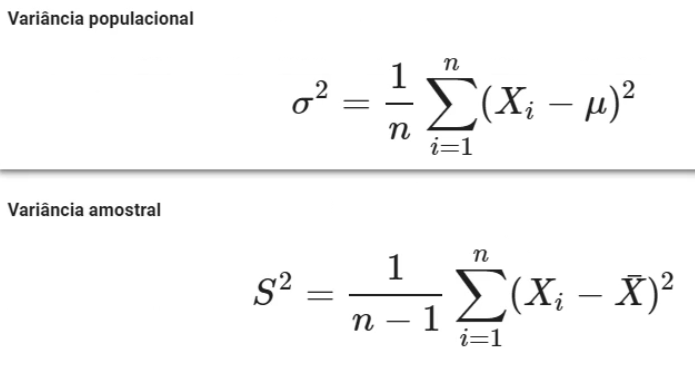

In [ ]:
notas_fulano['Desvio ^ 2'] = notas_fulano['Desvio'].pow(2) ## .pow(2) está elevando o desvio ao quadrado
notas_fulano

Matérias,Fulano,Desvio,|Desvio|,Desvio ^ 2
Matemática,8,0.285714,0.285714,0.081633
Português,10,2.285714,2.285714,5.224490
Inglês,4,-3.714286,3.714286,13.795918
Geografia,8,0.285714,0.285714,0.081633
História,6,-1.714286,1.714286,2.938776
Física,10,2.285714,2.285714,5.224490
Quimica,8,0.285714,0.285714,0.081633


In [ ]:
notas_fulano['Desvio ^ 2'].sum() / (len(notas_fulano) - 1) ## aqui estamos somando os desvios ao quadrado e dividindo pela quantidade menos 1.
                                                        ## dessa forma obtemos a variancia amostral.

4.57142857142857

In [ ]:
variancia = notas_fulano['Fulano'].var()  ## forma mais simples é utilizando o .var()
variancia

4.57142857142857

# Desvio Padrão

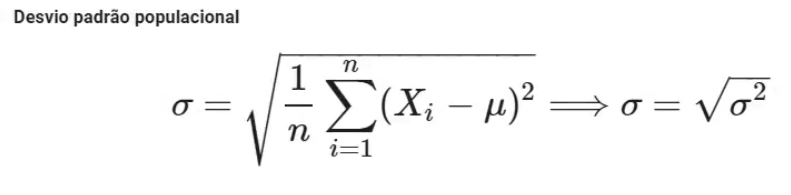

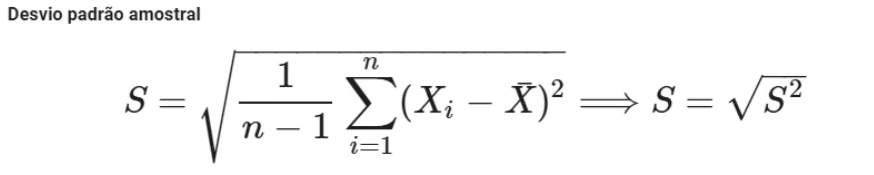

In [ ]:
np.sqrt(variancia)  ## desvio padrão é a raiz da variância. Podemos calcular a variancia e tirar a raiz com np.sqrt() - metodo Numpy

2.1380899352993947

In [ ]:
desvio_padrao = notas_fulano['Fulano'].std()  ## podemos também tirar o desvio diretamente com .std()
desvio_padrao

2.1380899352993947

In [ ]:
df.std() ## tirando desvio padrão de todos

Matérias
Fulano      2.138090
Beltrano    4.460141
Silcrano    0.566947
dtype: float64

exemplo


In [ ]:
dataset22 = pd.DataFrame({
    'Sexo': ['H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M'],
    'Idade': [53, 72, 54, 27, 30, 40, 58, 32, 44, 51]
})

In [ ]:
dataset22['Idade'].std()  ## tirando desvio padrão

14.184890239656813

In [ ]:
mulheres = dataset22[dataset22['Sexo'] == 'M']

# Calcular o desvio padrão da idade das mulheres
desvio_padrao_idade_mulheres = mulheres['Idade'].std()

print(desvio_padrao_idade_mulheres)

16.64531966249572


In [ ]:
dataset.groupby(['Sexo']).std().loc['M'] ## outra forma de calcular usando . groupby e .loc[]

Idade    16.64532
Name: M, dtype: float64

## Projeto Final